In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
skill_demand = pd.read_csv('skill_demand2.csv')
#skills_top_paying_jobs = pd.read_json('skills_top_paying_jobs.json')
top_skills = pd.read_csv('top_skills.csv')
top_UK_jobs = pd.read_csv('top_paying_jobs_data_analyst_UK.csv')
over_40_skills = pd.read_csv('skills_40000_uk.csv')
jobs_via = pd.read_csv('jobs_via.csv')
all_jobs_uk = pd.read_csv('all_jobs_uk.csv')

In [32]:
top_UK_jobs.head()

,job_id,job_title,job_location,salary_year_avg,company_name
0,1401033,Market Data Lead Analyst,United Kingdom,180000.0,Deutsche Bank
1,1813715,Data Architect - Trading and Supply,United Kingdom,156500.0,Shell
2,1813715,Data Architect - Trading and Supply,United Kingdom,156500.0,Shell
3,1813715,Data Architect - Trading and Supply,United Kingdom,156500.0,Shell
4,1813715,Data Architect - Trading and Supply,United Kingdom,156500.0,Shell


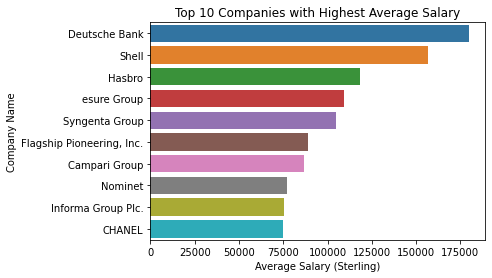

In [54]:
top_n = 10  # specify the number of top companies to display
top_companies = top_UK_jobs.groupby('company_name')['salary_year_avg'].mean().nlargest(top_n)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title(f'Top {top_n} Companies with Highest Average Salary')
plt.xlabel('Average Salary (Sterling)')
plt.ylabel('Company Name')
plt.show()

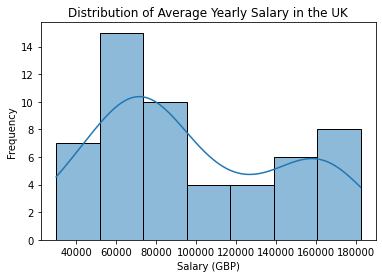

In [56]:
sns.histplot(data=all_jobs_uk, x='salary_year_avg', kde=True)
plt.title('Distribution of Average Yearly Salary in the UK')
plt.xlabel('Salary (GBP)')
plt.ylabel('Frequency')
plt.show()

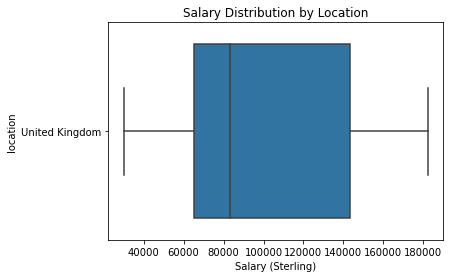

In [59]:
sns.boxplot(data=all_jobs_uk, x='salary_year_avg', y='job_location')
plt.title('Salary Distribution by Location')
plt.xlabel('Salary (Sterling)')
plt.ylabel('location')
plt.show()

In [10]:
skill_demand.head()

,skill_id,skills,demand_count,avg_salary
0,98,kafka,40,129999
1,101,pytorch,20,125226
2,31,perl,20,124686
3,99,tensorflow,24,120647
4,63,cassandra,11,118407


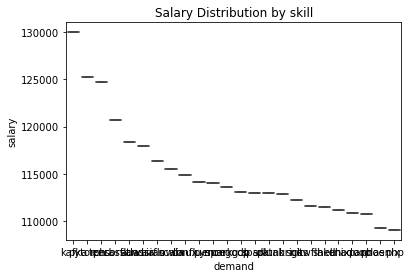

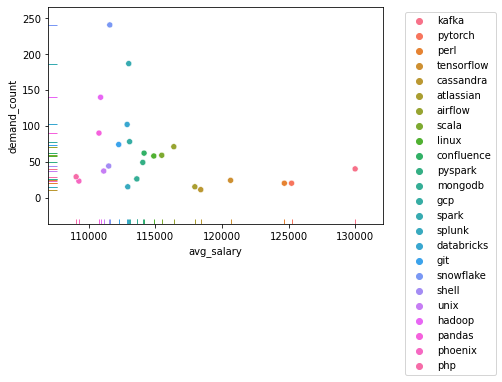

<Figure size 720x432 with 0 Axes>

In [18]:
sns.scatterplot(data=skill_demand, x='avg_salary', y='demand_count', hue='skills')
sns.rugplot(data=skill_demand, x='avg_salary', y='demand_count', hue='skills')
# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust figure size
plt.figure(figsize=(10, 6))  # Change width and height as needed

plt.show()

<AxesSubplot:xlabel='skills', ylabel='demand_count'>

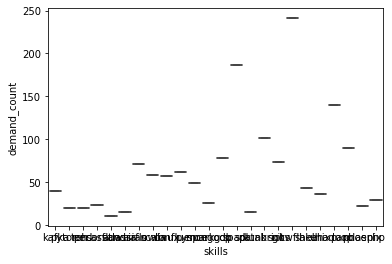

In [22]:
sns.boxplot(data=skill_demand, x='skills', y='demand_count')

In [44]:
jobs_via.head()

,job_id,job_title,job_location,job_schedule_type,salary_year_avg,job_posted_date,job_via,company_name
0,1401033,Market Data Lead Analyst,United Kingdom,Full-time,180000.0,2023-11-10 08:32:22,via Ai-Jobs.net,Deutsche Bank
1,31795,Analytics Engineer - Data Engineer,United Kingdom,Full-time,165000.0,2023-10-19 09:37:02,via Ai-Jobs.net,Deliveroo
2,686175,Analytics Engineer,United Kingdom,Full-time,165000.0,2023-10-19 18:37:07,via Ai-Jobs.net,Deliveroo
3,1419617,Threat Analytics Data Scientist,United Kingdom,Full-time,163525.0,2023-12-08 16:15:29,via Ai-Jobs.net,Deutsche Bank
4,947634,GIS Data Scientist (Active Intelligence),United Kingdom,Full-time,162000.0,2023-12-30 09:13:05,via Ai-Jobs.net,BT Group


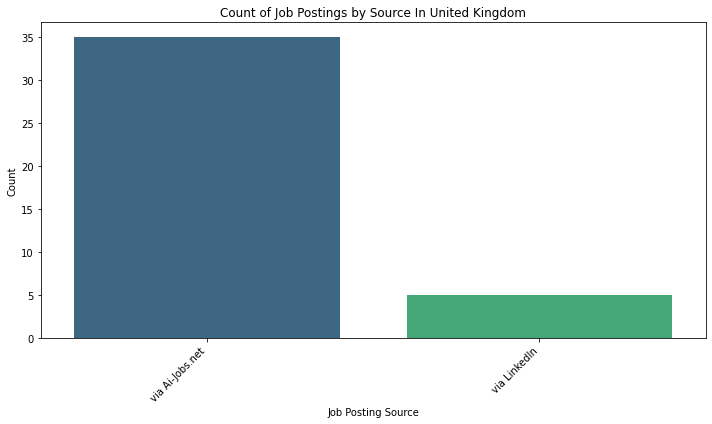

In [46]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.countplot(data=all_jobs_uk, x='job_via', order=all_jobs_uk['job_via'].value_counts().index, palette='viridis')  # Plotting the count of job postings by sources
plt.title('Count of Job Postings by Source In United Kingdom')  # Title of the plot
plt.xlabel('Job Posting Source')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


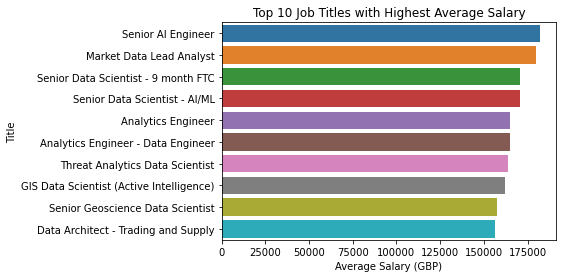

In [52]:
top_n = 10  # specify the number of top companies to display
top_jobs = all_jobs_uk.groupby('job_title')['salary_year_avg'].mean().nlargest(top_n)
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title(f'Top {top_n} Job Titles with Highest Average Salary')
plt.xlabel('Average Salary (GBP)')
plt.ylabel('Title')
plt.show()